# Sample Code to Run Kaplan-Meier Estimator.

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import random

seed = 0
random.seed(seed)
np.random.seed(seed)

## Load Data

In [17]:
# Prerequisite: pip install SurvSet
from SurvSet.data import SurvLoader

dataset_name = "flchain"
loader = SurvLoader()
df, _ = loader.load_dataset(ds_name=dataset_name).values()
print(df)

       pid  event  time  num_age  num_kappa  num_lambda  num_flc_grp  \
0        0      1    85       97      5.700       4.860           10   
1        1      1  1281       92      0.870       0.683            1   
2        2      1    69       94      4.360       3.850           10   
3        3      1   115       92      2.420       2.220            9   
4        4      1  1039       93      1.320       1.690            6   
...    ...    ...   ...      ...        ...         ...          ...   
7869  7869      0  4997       52      1.210       1.610            6   
7870  7870      0  3652       52      0.858       0.581            1   
7871  7871      0  2507       54      1.700       1.720            8   
7872  7872      0  4982       53      1.710       2.690            9   
7873  7873      0  3995       50      1.190       1.250            4   

      num_creatinine  num_sample_yr fac_sex  fac_chapter fac_sample_yr  \
0                1.7           1997       F  Circulatory     

## Run Kaplan-Meier Estimator

In [18]:
import cenreg.model.nonparametric

ecdf = cenreg.model.nonparametric.kaplan_meier_estimator(df["time"].values, df["event"].values)

## Plot Kaplan-Meier Curve

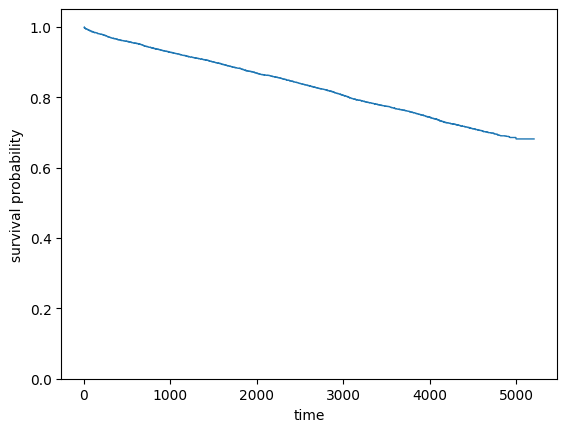

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('time')
plt.ylabel('survival probability')
plt.ylim([0.0,1.05])
x = ecdf.bins
y = 1.0 - ecdf.cdf(x[:-1])
plt.stairs(y, x, baseline=None)
plt.show()